 Import the libraries

In [216]:
%matplotlib inline

import numpy as np
import pandas as pd
from   sklearn                import datasets

# data graphing
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing
from   sklearn                import model_selection
from   sklearn                import preprocessing
from   sklearn.preprocessing  import StandardScaler
# Importing train_test_split function from model_selection module in scikit-learn
from sklearn.model_selection import train_test_split


# unsupervised : k-means clustering
from   sklearn.cluster        import KMeans
from   sklearn.decomposition  import PCA
# unsupervised : evaluation
from   sklearn.metrics        import confusion_matrix, classification_report

# supervised : classification
from   sklearn.linear_model   import LogisticRegression
from   sklearn.tree           import DecisionTreeClassifier
from   sklearn                import tree

# supervised : regression
from   sklearn                import metrics, linear_model
from sklearn.linear_model     import Ridge
from sklearn.ensemble         import GradientBoostingRegressor

# ignore warning
from   warnings               import filterwarnings
filterwarnings('ignore')

 Import and inspect the dataset

#  Exploratory data analysis  

[link to data set](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard_2023 .csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [186]:
#Exploring for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [187]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [188]:
classes = df['Class'].value_counts()

# calculate percentage share of non-fraudulent transactions
non_fraud_share = classes[0]/df['Class'].count()*100

# calculate percentage share of fraudulent transactions
fraud_share = classes[1]/df['Class'].count()*100

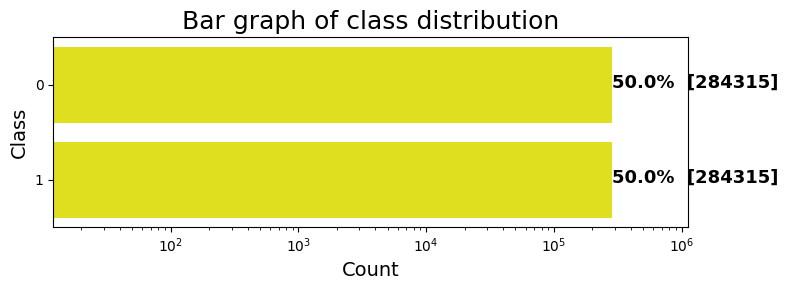

In [189]:
# create a bar plot for non-fraudulent and fraudulent transcations
fig, ax = plt.subplots(figsize = (8, 3))
sns.barplot(x = classes, y = classes.index, orient = 'h', ax = ax, color = 'yellow')

# set log scale on x-axis
ax.set_xscale('log'),

# set labels
ax.set_xlabel('Count', fontsize = 14)
ax.set_ylabel('Class', fontsize = 14)
ax.set(xscale='log', xlabel = 'Count', ylabel='Class')
ax.set_title('Bar graph of class distribution', fontsize=18)
ax.set_xlim(10^6, 0)
bars = []

# display counts and percentages
for patch in ax.patches:
    bars.append(patch)
ax.text(bars[0].get_width() , bars[0].get_y() +0.43,
        str(round(fraud_share, 2))+'%  '+'['+str(classes[0])+']',
        fontsize = 13, fontweight = 'bold', color = 'black')
ax.text(bars[1].get_width()+ 0.9, bars[1].get_y()+0.43,
        str(round(fraud_share, 2))+'%  '+'['+str(classes[1])+']',
        fontsize = 13, fontweight = 'bold', color = 'black')

# graph the plot
plt.tight_layout()
plt.show()

Analyze predictor's distribution

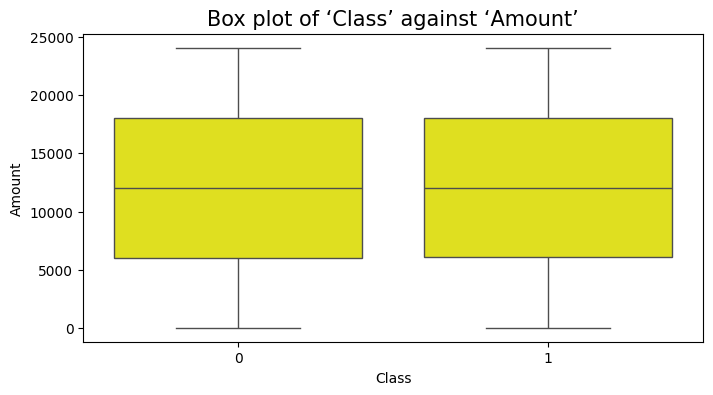

In [190]:
# plot 'Class' against 'Amount' for visual pattern detection
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df['Class'], y = df['Amount'], ax = ax, color ='yellow')
ax.set_title('Box plot of ‘Class’ against ‘Amount’', fontsize = 15)
plt.show()

In [191]:
df[df['Class']==0]['Amount'].median()

11996.9

In [192]:
df[df['Class']==1]['Amount'].median()

12062.45

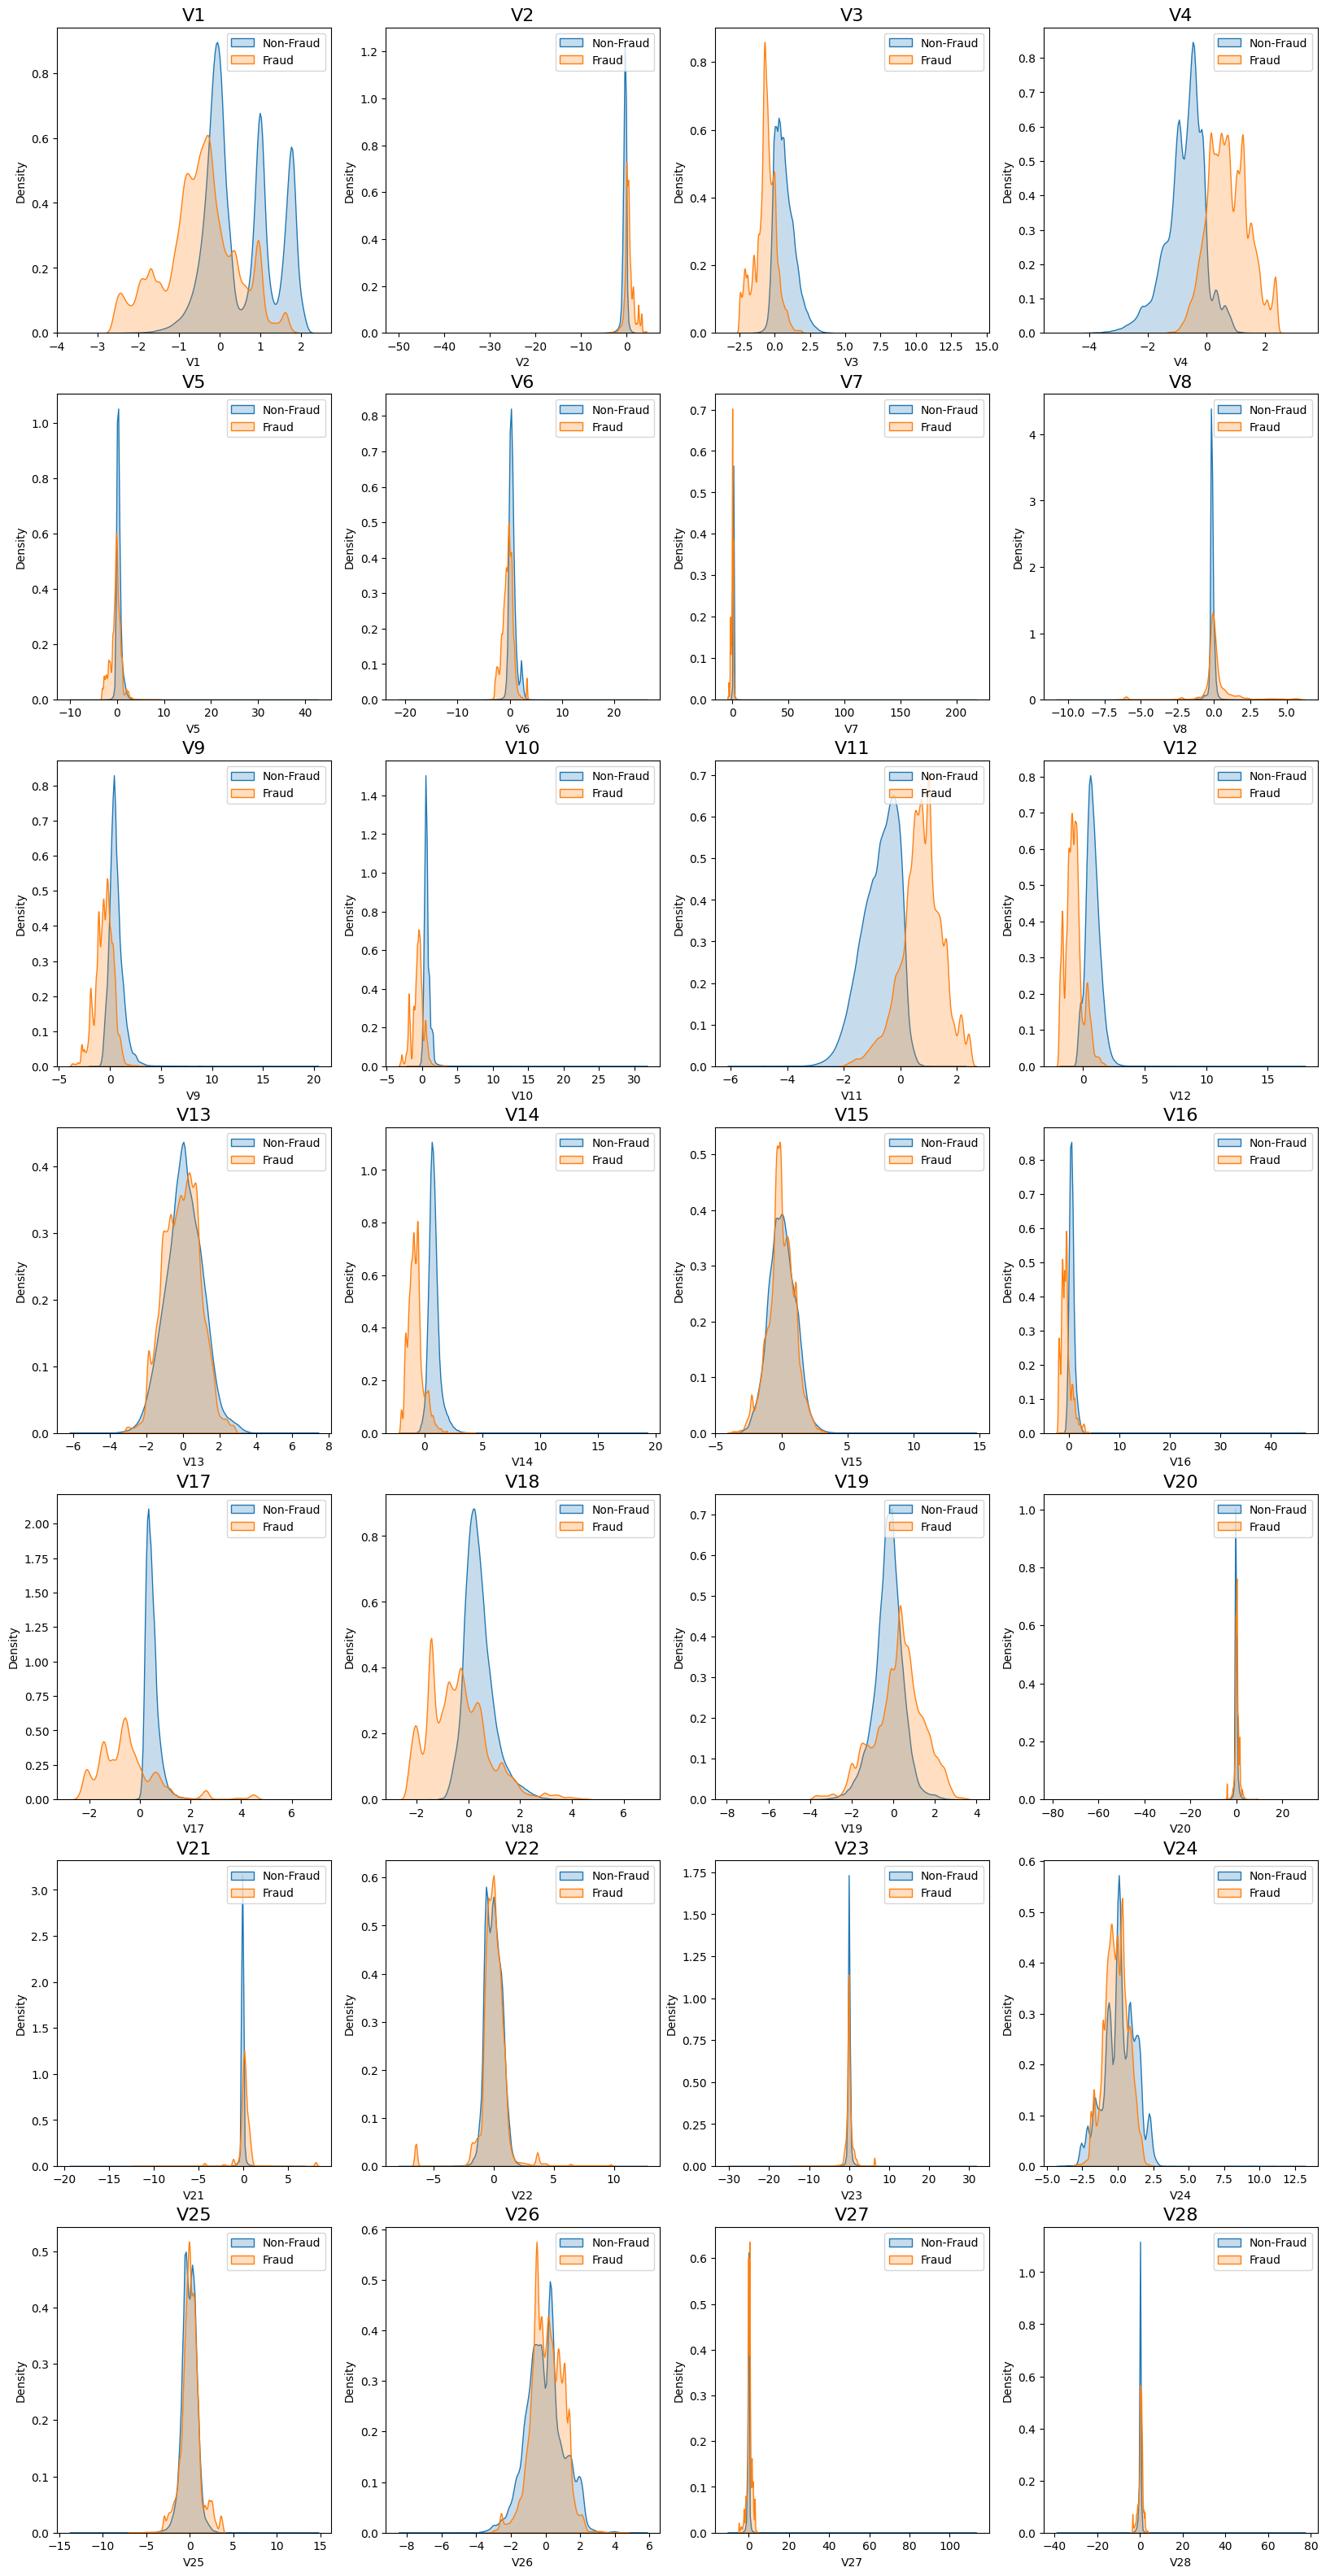

In [194]:
# set figure and grid
num_cols = 4
num_rows = 7
fig = plt.figure(figsize = (20, 40))
grid = plt.GridSpec(num_rows, num_cols, figure = fig)
i = 0

# plot distribution using for loop
for i in range(1, 29):
    col = 'V'+ str(i)
    non_fraud = df.loc[df.Class == 0][col]
    fraud = df.loc[df.Class == 1][col]
    ax = plt.subplot(grid[i-1])
    ax = sns.kdeplot(non_fraud, fill = True)
    ax = sns.kdeplot(fraud, fill = True)
    ax.set_title(col, fontsize = 16)
    plt.legend(labels = ['Non-Fraud', 'Fraud'])

# graph the plot
plt.show()

In [ ]:
corr_df = df.corr(method = 'spearman').round(2)
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=[25,15])
sns.heatmap(corr_df, cmap=sns.color_palette("magma", as_cmap = True), annot=True, mask = mask)
plt.show()

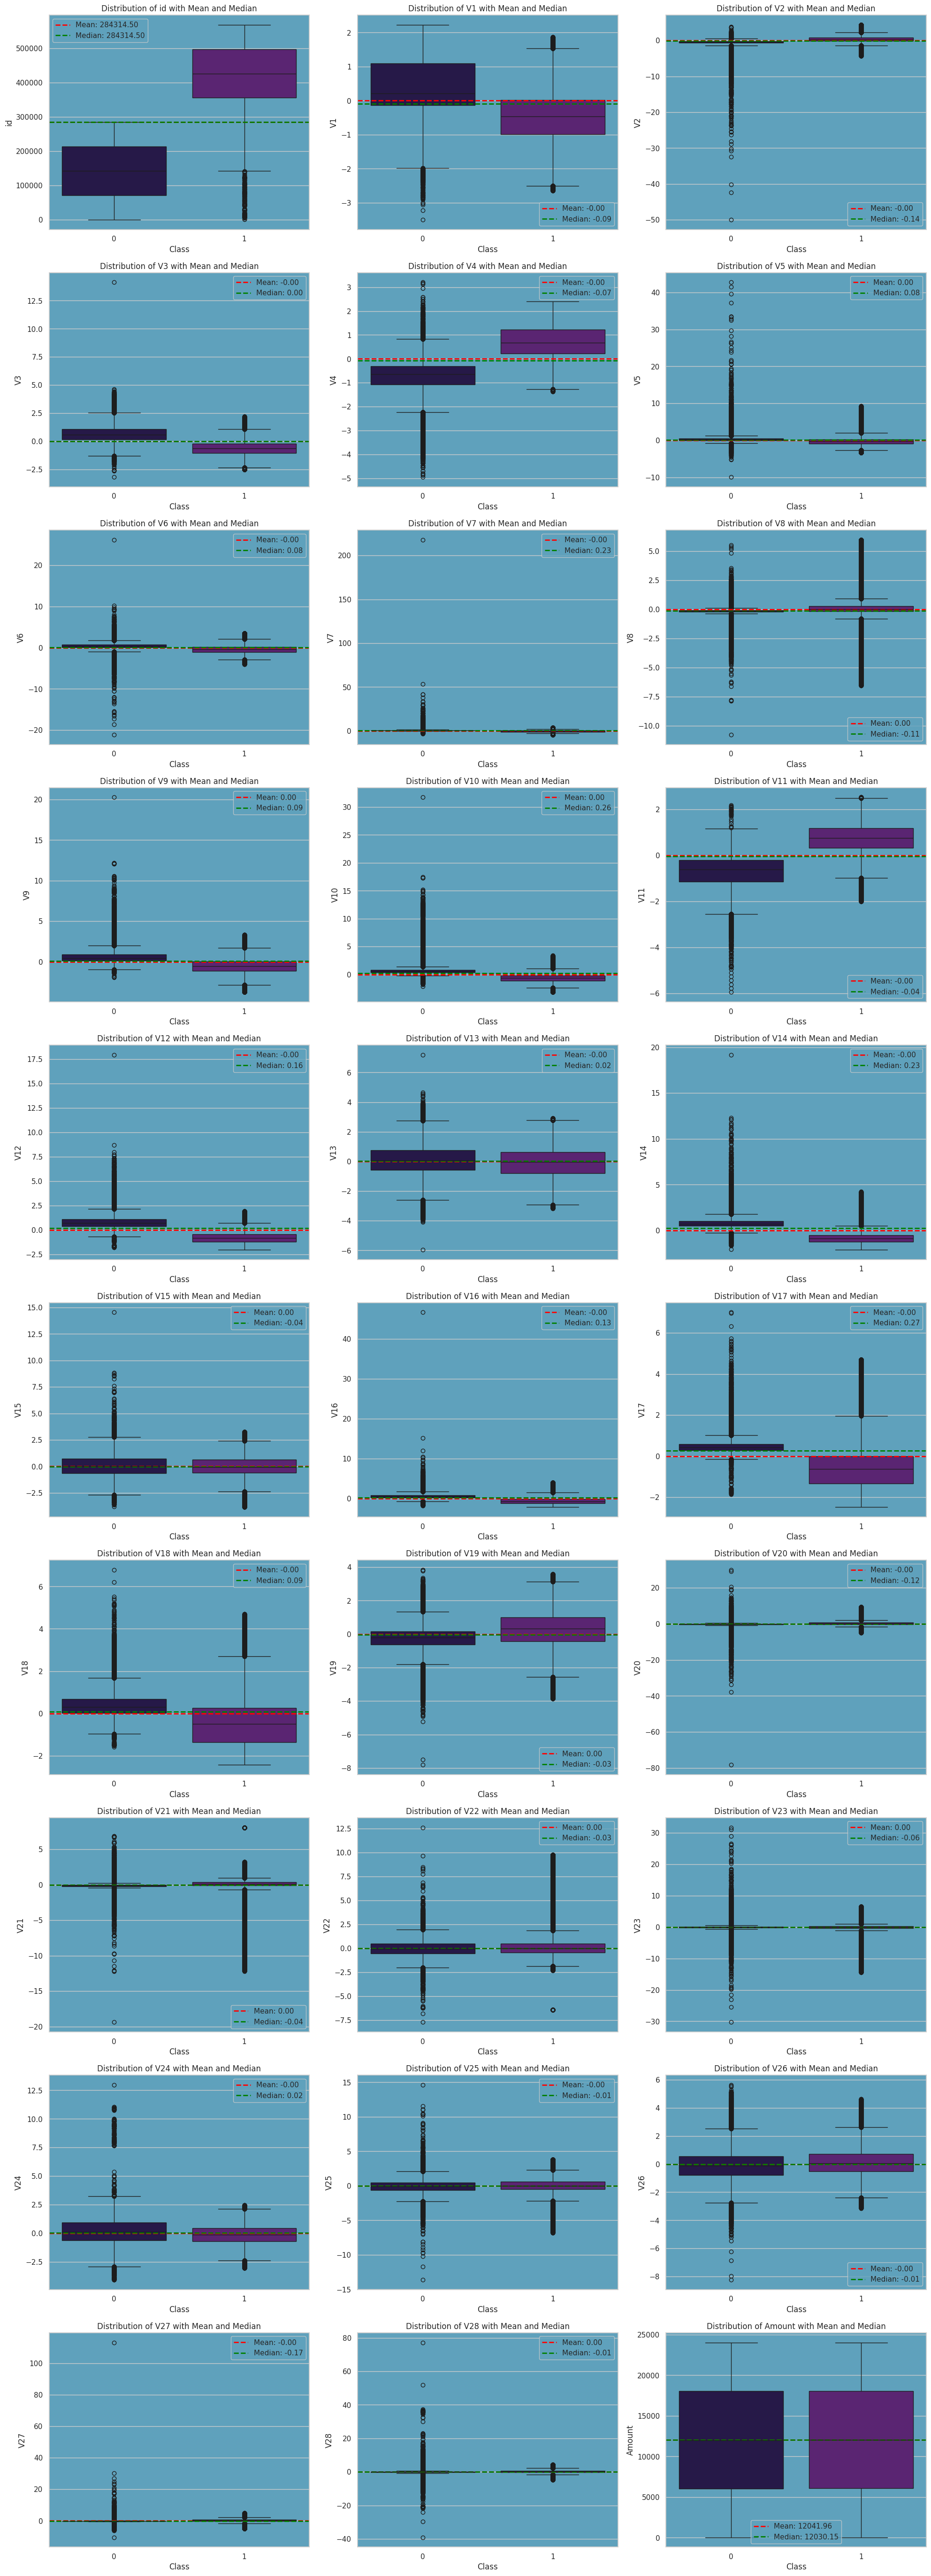

In [195]:
def create_boxplot_subplots(df, columns, hue, theme_style, theme_rc, palette, figsize=(15, 10)):
    sns.set_theme(style=theme_style, rc=theme_rc)

    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()

    plot_index = 0
    for col in columns:
        if col == hue:  # Skip the hue column itself
            continue

        sns.boxplot(data=df, x=hue, y=col, palette=palette, ax=axes[plot_index])

        mean_value = df[col].mean()
        median_value = df[col].median()

        axes[plot_index].axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        axes[plot_index].axhline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

        axes[plot_index].set_title(f'Distribution of {col} with Mean and Median')
        axes[plot_index].set_xlabel(hue)
        axes[plot_index].set_ylabel(col)
        axes[plot_index].legend()

        plot_index += 1

    # Remove extra axes
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
columns = df.columns.to_list()
palette = sns.color_palette("magma")  # Use the color palette list instead of cmap

create_boxplot_subplots(df=df, columns=columns, hue='Class',
                        theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"},
                        palette=palette, figsize=(20, 60))

 Drop columns

In [ ]:
drop_cols = ['V7', 'V13', 'V15','V20', 'V22', 'V24', 'V25', 'V26', 'id']
df = df.drop(drop_cols, axis = 1)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,...,V16,V17,V18,V19,V21,V23,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,-0.130006,0.727159,0.637735,-0.987020,...,0.215598,0.512307,0.333644,0.124270,-0.110552,-0.134794,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,-0.133118,0.347452,0.529808,0.140107,...,0.789188,0.403810,0.201799,-0.340687,-0.194936,0.079469,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,-0.095576,-0.261297,0.690708,-0.272985,...,-0.577514,0.886526,0.239442,-2.366079,-0.005020,0.945045,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,-0.065130,-0.205698,0.575231,-0.752581,...,-0.030669,0.242629,2.178616,-1.345060,-0.146927,-0.214048,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,-0.212660,1.049921,0.968046,-1.203171,...,0.224538,0.366466,0.291782,0.445317,-0.106984,-0.161666,0.023712,0.419117,14278.97,0


#Supervised learning : Classification

Model evaluation functions for classifiction (Split the data into training and testing data)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# fucntion evaluates and returns test performance based on metrics scores
def evaluate_class_model(model, x_test, y_test):
    # predict the test data
    y_predict      = model.predict(x_test)

    # calculate metrics scores
    accuracy       = metrics.accuracy_score(y_test, y_predict)
    precision      = metrics.precision_score(y_test, y_predict)
    recall         = metrics.recall_score(y_test, y_predict)
    f1             = metrics.f1_score(y_test, y_predict)

    # calculate area under the curve
    y_predict_prob = model.predict_proba(x_test)[::,1]
    auc            = metrics.roc_auc_score(y_test, y_predict_prob)

    # return retrieved values
    return {'acc': accuracy, 'pre': precision, 'rec': recall, 'f1': f1, 'auc': auc}

# fucntion evaluates and returns scores necessary for ROC cuve graphing
def evaluate_class_graph(model, x_test, y_test):
    # predict the test data
    y_predict      = model.predict(x_test)

    # calculate area under the curve
    y_predict_prob = model.predict_proba(x_test)[::,1]
    fpr, tpr, _    = metrics.roc_curve(y_test, y_predict_prob)
    auc            = metrics.roc_auc_score(y_test, y_predict_prob)

     # return retrieved values
    return {'fpr': fpr, 'tpr': tpr}

# function evalutes and prints performance results
def print_class_metrics(results, model_name):
    # store each metrics into different variable
    accuracy       = np.nanmean(results['acc'])
    precision      = np.nanmean(results['pre'])
    recall         = np.nanmean(results['rec'])
    f1             = np.nanmean(results['f1'])
    auc            = np.nanmean(results['auc'])

    # print results
    heading_length = 48
    print()
    print('='*heading_length)
    print(f'Cross validation metrics : {model_name}')
    print('='*heading_length)
    print(f'Accuracy                 : {accuracy*100:.2f}%')
    print(f'Precision                : {precision*100:.2f}%')
    print(f'Recall                   : {recall*100:.2f}%')
    print(f'F1                       : {f1*100:.2f}%')
    print(f'AUC                      : {auc*100:.2f}%')
    print('-'*heading_length)
    print()

In [ ]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x, y, test_size = 0.5,
                                                                     random_state = 150, stratify = y)

In [ ]:
x_train.shape

(284315, 21)

Use PowerTransformer to reduce set's skewness

In [ ]:
pt = preprocessing.PowerTransformer()
# transform the training set
cols = x_train.columns
pt.fit(x_train)
x_train = pt.transform(x_train)
#transform the test data
pt = preprocessing.PowerTransformer()
pt.fit(x_test)
x_test = pt.transform(x_test)

In [ ]:
# visualize the transformation
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)
x_train.head()

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,...,V14,V16,V17,V18,V19,V21,V23,V27,V28,Amount
0,0.022026,-0.301969,1.570407,-1.058745,0.294993,0.309875,-0.091528,0.271523,0.419640,0.078613,...,0.890988,0.584722,0.348896,0.218820,-0.108702,-0.070408,0.030725,-0.128166,0.228527,-1.380303
1,1.618206,-0.576067,0.351826,-0.413317,0.050874,0.078407,-0.173763,1.242461,0.508803,-0.969290,...,0.567961,0.512269,0.284231,0.060012,-0.363704,-0.154023,0.307628,-0.182881,-0.155276,-0.601514
2,-2.127264,2.982982,-2.133995,2.352551,-2.578580,0.850805,-2.367416,-2.651004,-2.653276,1.120289,...,-0.939892,-1.560197,-1.559875,-1.720316,0.809989,-4.051000,2.707000,-3.628402,-1.768500,0.494323
3,1.550261,-0.438309,-0.131144,-0.128102,0.506482,-0.304844,-0.245928,0.191216,0.830324,-0.068655,...,1.388798,0.284651,0.261394,0.335356,-0.361488,0.017508,-0.190916,-0.295421,-0.241613,-0.429266
4,-0.069343,-0.038922,1.028684,-0.684419,0.379974,0.018769,-0.153330,0.436774,0.567210,-1.069777,...,0.448497,0.824629,0.384844,0.326774,-0.136279,-0.232313,-0.060726,0.040801,0.258896,-0.857813


Standardize the train and test set features

In [ ]:
# standardize the train set feautres
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# standardize the test set feautres
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

Decision Tree

In [ ]:
# apply decision tree classifier
dec_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dec_tree.fit(x_train_scaled, y_train)

# evaluate and print performance
model_name = 'DecisionTree'
dec_tree_eval = evaluate_class_model(dec_tree, x_test_scaled, y_test)
print_class_metrics(dec_tree_eval, model_name)


Cross validation metrics : DecisionTree
Accuracy                 : 94.46%
Precision                : 99.00%
Recall                   : 89.83%
F1                       : 94.19%
AUC                      : 97.96%
------------------------------------------------



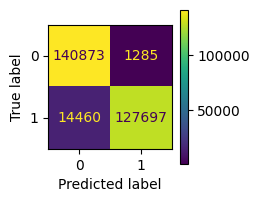

In [ ]:
test_pred = dec_tree.predict(x_test_scaled)

cm = confusion_matrix(y_test, test_pred, labels = [0,1])
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax=ax)

In [ ]:
import sklearn.model_selection as skm
ccp_path = dec_tree.cost_complexity_pruning_path(x_train_scaled, y_train)
kfold = skm.KFold(5,
                  random_state=1,
                  shuffle=True)

In [ ]:
ccp_path.ccp_alphas

array([0.        , 0.00130069, 0.00757206, 0.01497028, 0.02173822,
       0.02284154, 0.05506918, 0.66155243])

In [ ]:
grid = skm.GridSearchCV(dec_tree,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(x_train_scaled, y_train)
grid.best_score_

0.9439952165731672

In [ ]:
best_ = grid.best_estimator_
# evaluate and print performance
model_name = 'DecisionTree'
dec_tree_eval = evaluate_class_model(best_, x_test_scaled, y_test)
print_class_metrics(dec_tree_eval, model_name)


Cross validation metrics : DecisionTree
Accuracy                 : 94.46%
Precision                : 99.00%
Recall                   : 89.83%
F1                       : 94.19%
AUC                      : 97.96%
------------------------------------------------



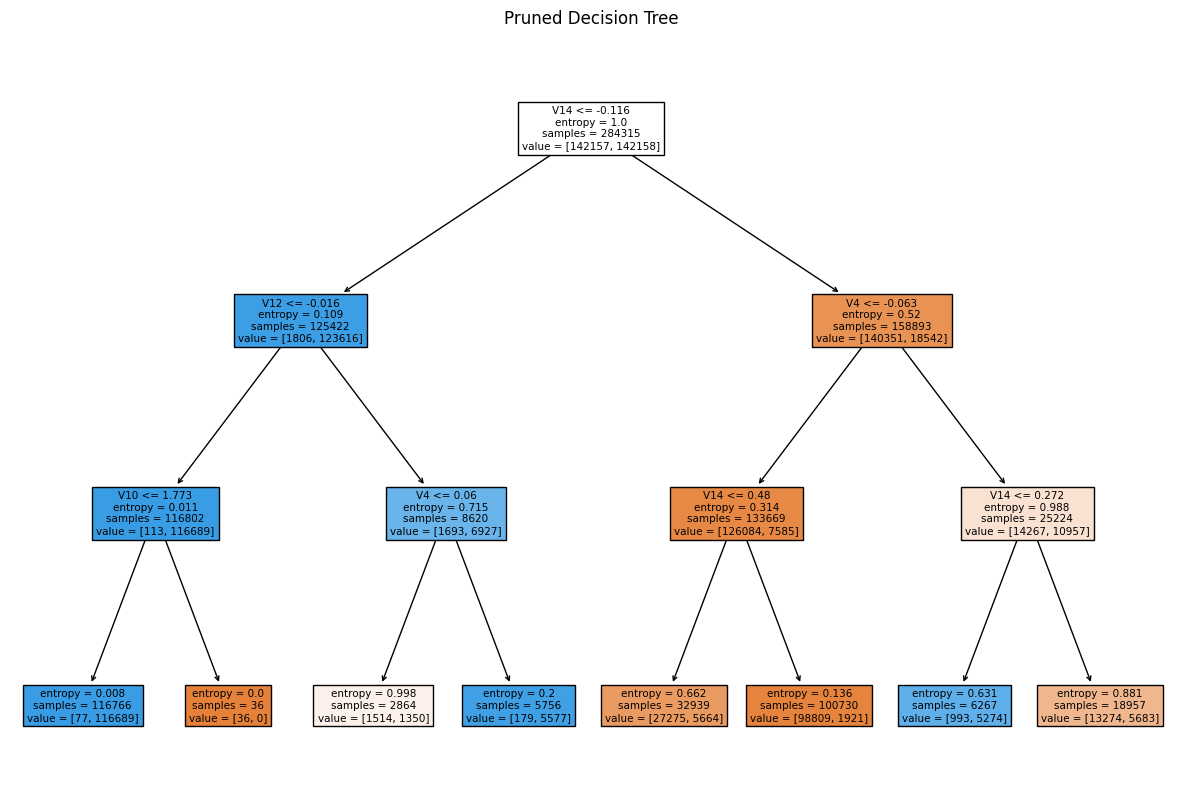

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(best_, filled=True, feature_names = x_train.columns)
plt.title("Pruned Decision Tree")
plt.show()

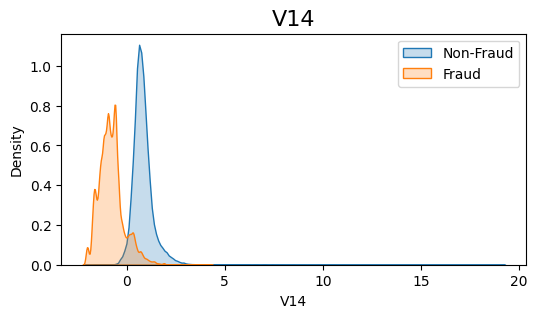

In [ ]:
col = 'V14'
non_fraud = df.loc[df.Class == 0][col]
fraud = df.loc[df.Class == 1][col]
plt.figure(figsize = (6, 3))
ax = sns.kdeplot(non_fraud, fill = True)
ax = sns.kdeplot(fraud, fill = True)
ax.set_title(col, fontsize = 16)
plt.legend(labels = ['Non-Fraud', 'Fraud'])

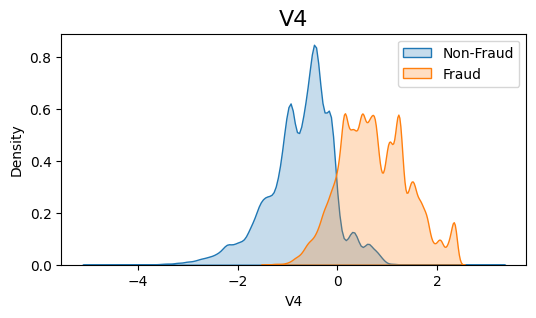

In [ ]:
col = 'V4'
non_fraud = df.loc[df.Class == 0][col]
fraud = df.loc[df.Class == 1][col]
plt.figure(figsize = (6, 3))
ax = sns.kdeplot(non_fraud, fill = True)
ax = sns.kdeplot(fraud, fill = True)
ax.set_title(col, fontsize = 16)
plt.legend(labels = ['Non-Fraud', 'Fraud'])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model with the training data
log_reg.fit(x_train, y_train)


# Evaluate and print performance
y_pred = log_reg.predict(x_train)
accuracy = (y_pred == y_train).mean()
print(f'Accuracy: {accuracy:.2f}')

# evaluate and print performance
model_name = 'Logistic Regression'
log_reg_eval = evaluate_class_model(log_reg, x_test, y_test)
print_class_metrics(log_reg_eval, model_name)

Accuracy: 0.96

Cross validation metrics : Logistic Regression
Accuracy                 : 95.66%
Precision                : 97.83%
Recall                   : 93.38%
F1                       : 95.55%
AUC                      : 99.02%
------------------------------------------------



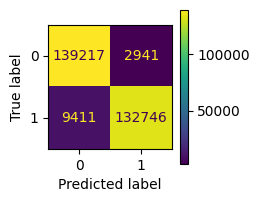

In [ ]:
test_pred = log_reg.predict(x_test)

cm = confusion_matrix(y_test, test_pred, labels = [0,1])
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax=ax)

In [ ]:
x_train_selected = x_train[['V4', 'V11', 'V14', 'V17']]
x_test_selected  = x_test[['V4', 'V11', 'V14', 'V17']]
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model with the training data
log_reg.fit(x_train_selected, y_train)


# Evaluate and print performance
y_pred = log_reg.predict(x_train_selected)
accuracy = (y_pred == y_train).mean()
print(f'Accuracy: {accuracy:.2f}')

# evaluate and print performance
model_name = 'Logistic Regression'
log_reg_eval = evaluate_class_model(log_reg, x_test_selected, y_test)
print_class_metrics(log_reg_eval, model_name)

Accuracy: 0.95

Cross validation metrics : Logistic Regression
Accuracy                 : 94.79%
Precision                : 96.96%
Recall                   : 92.49%
F1                       : 94.67%
AUC                      : 98.61%
------------------------------------------------



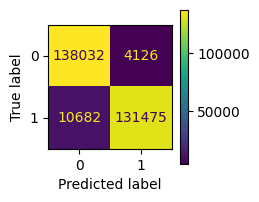

In [ ]:
test_pred = log_reg.predict(x_test_selected)

cm = confusion_matrix(y_test, test_pred, labels = [0,1])
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax=ax)

In [ ]:
x_train_selected.columns

Index(['V4', 'V11', 'V14', 'V17'], dtype='object')

In [ ]:
log_reg.coef_

array([[ 2.81838044,  1.11249007, -3.10886573, -0.50674633]])

In [ ]:
log_reg.intercept_

array([1.67520499])

#Unsupervised learning

Implement elbow method to determine optimal number of k clusters (K-means clustering)



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard_2023 .csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
drop_cols = ['V7', 'V13', 'V15','V20', 'V22', 'V24', 'V25', 'V26', 'id']
df = df.drop(drop_cols, axis = 1)

#df = df[['V14', 'V4', 'Class']]

In [ ]:
temp_df = df.drop('Class', axis=1)
# Standardize variables
scaler = StandardScaler()
temp_df_scaled = scaler.fit_transform(temp_df)

# Perform dimensional reduction
pca = PCA()
principal_components = pca.fit(temp_df_scaled)
#principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

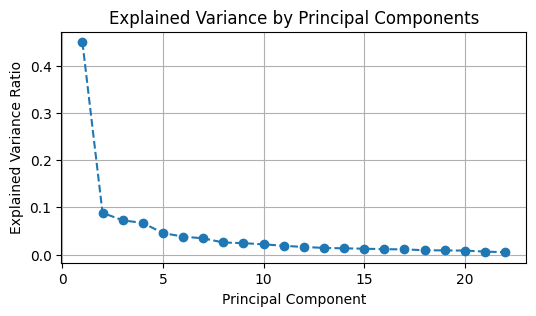

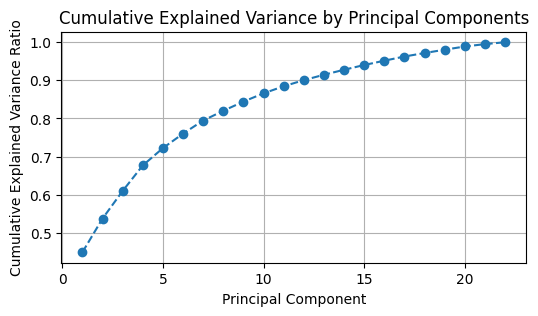

In [ ]:
# Calculate explained variance
explained_variance = principal_components.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Optional: Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [ ]:
# Perform dimensional reduction
pca = PCA(n_components=5)
principal_components = pca.fit_transform(temp_df_scaled)

# Define the column names for the principal components
columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5']

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=columns)

# Show the head of the DataFrame
print(principal_df.head())

   principal component 1  principal component 2  principal component 3  \
0               2.218076              -0.195048              -0.174313   
1               2.176504              -0.138423              -0.182727   
2               2.325396              -1.014616               0.471390   
3               2.791041              -0.160801              -0.053182   
4               2.206968               0.077813               0.058590   

   principal component 4  principal component 5  
0               0.945178               0.862996  
1               0.066923              -0.798797  
2              -0.306052              -1.373213  
3              -0.324914              -0.962837  
4               1.191967               0.320952  


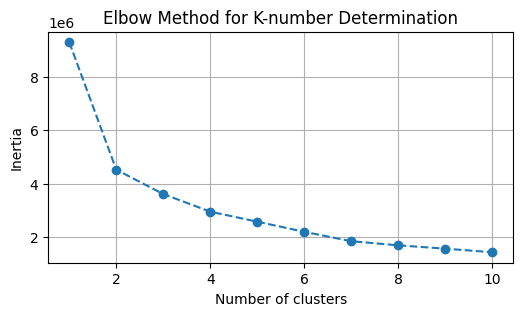

In [ ]:
# Define variables
temp_df = principal_df
inertias = []
max_clusters = 10

# Elbow method function
def elbow_method(data, max_clusters):
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Calculate inertias for different number of clusters
inertias = elbow_method(principal_df, max_clusters)

# Plot the elbow graph
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(inertias) + 1), inertias, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-number Determination')
plt.grid(True)
plt.show()

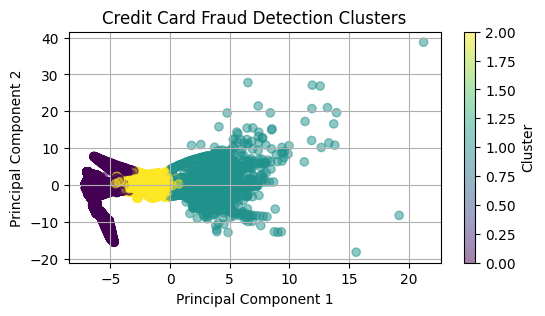

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_df)
principal_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(6, 3))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=principal_df['Cluster'], cmap='viridis', alpha = 0.5)
plt.title('Credit Card Fraud Detection Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

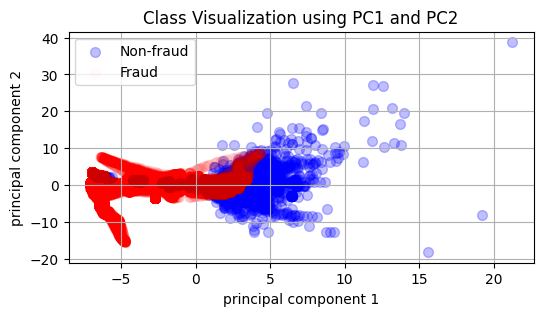

In [ ]:
principal_df['Class'] = df['Class']

# Plot the clusters using 'V14' and 'V4'
plt.figure(figsize=(6, 3))

plt.scatter(principal_df[principal_df['Class'] == 0]['principal component 1'], principal_df[principal_df['Class'] == 0]['principal component 2'], s=50, c='blue', label='Non-fraud', alpha=0.25)
plt.scatter(principal_df[principal_df['Class'] == 1]['principal component 1'], principal_df[principal_df['Class'] == 1]['principal component 2'], s=50, c='red', label='Fraud', alpha=0.02)


plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Class Visualization using PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

#Regression

Dataset: Abalone Obtained from: UCI Repository

#### Parameters
- Feature 1: Length (mm)
- Feature 2: Diameter (mm)
- Feature 3: Height (mm)
- Feature 4: Whole weight (grams)
- Feature 5: Shucked weight (grams)
- Feature 6: Viscera weight (grams)
- Feature 7: Shell weight (grams)
- Target: Rings (number of rings)

In [196]:
pip install ucimlrepo

In [197]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.3 MB/s eta 0:00:00


In [198]:
# Import the statsmodels library
import statsmodels.api as sm

# Importing fetch_ucirepo function from ucimlrepo module
from ucimlrepo import fetch_ucirepo

# Importing CatBoost and CatBoostRegressor classes from catboost library
from catboost import CatBoost , CatBoostRegressor


# Import GridSearchCV from scikit-learn
from sklearn.model_selection import GridSearchCV

# Set the seaborn theme to 'darkgrid'
sns.set_theme(style='whitegrid')

In [199]:
# fetch dataset from UCI database
abalone = fetch_ucirepo(id=1)

#Read the original dataset into a pandas dataframe
df = abalone.data.original

In [200]:
#View general informaiton of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [201]:
#View the first 5 rows of the dataset
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [202]:
#Checking if there are any null values with iunt dataset
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Rings,0


## Data Wrangling

In [204]:
# Select numerical columns from the DataFrame
num_cols = df.select_dtypes('number').columns

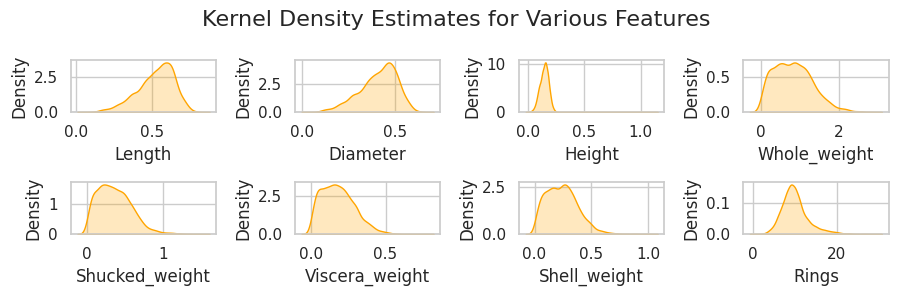

In [205]:
# Create subplots with 3 rows and 3 columns, and set the overall figure size
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(9, 3))

# Set the title for the entire figure
plt.suptitle('Kernel Density Estimates for Various Features', fontsize=16)

# Iterate over numerical columns and plot kernel density estimates for each column
for i, col in enumerate(num_cols, 0):
    # Set the subplot position
    plt.subplot(2, 4, i+1)

    # Plot the kernel density estimate for the current column
    sns.kdeplot(df[col], color='orange', fill=True)

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

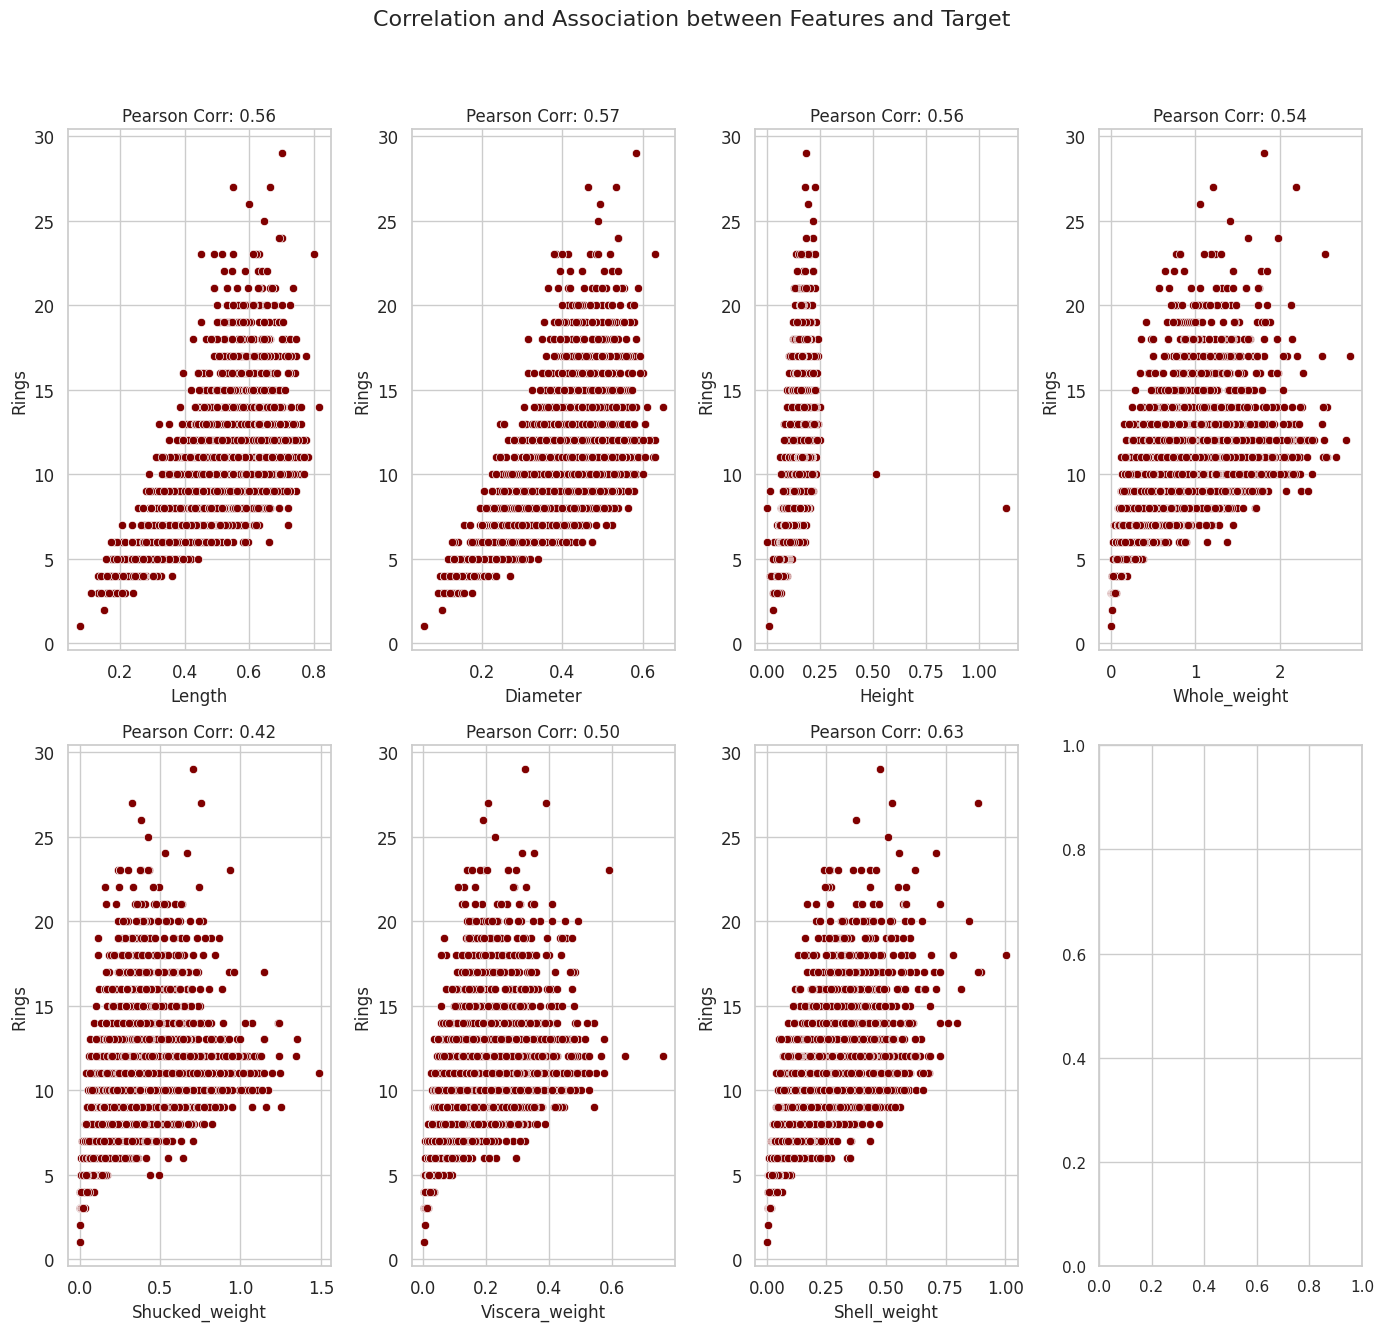

In [206]:
from scipy.stats import pearsonr

# Create subplots with 2 rows and 4 columns, and set the overall figure size
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 14))

# Set the title for the entire figure
plt.suptitle('Correlation and Association between Features and Target', fontsize=16)

# Iterate over numerical columns except 'Rings' and plot regression plots with correlation coefficients
for i, col in enumerate(num_cols.drop('Rings'), 0):
    # Set the subplot position
    plt.subplot(2, 4, i + 1)

    # Plot the regression plot between 'Rings' and the current column
    sns.scatterplot(y=df['Rings'], x=df[col],
                color='maroon')
               # scatter_kws={'s': 6},
                #ci=False,
                #order=False)

    # Calculate Pearson correlation coefficient
    corr_coef, _ = pearsonr(df[col], df['Rings'])

    # Set x-label, y-label, and title with Pearson correlation coefficient
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rings', fontsize=12)
    plt.title(f'Pearson Corr: {corr_coef:.2f}', fontsize=12)

    # Set font size for x-axis and y-axis ticks
    plt.tick_params(axis='x', which='both', labelsize=12)
    plt.tick_params(axis='y', which='both', labelsize=12)

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()


In [207]:
df['Height'].replace(0 , df['Height'].median(),inplace= True)

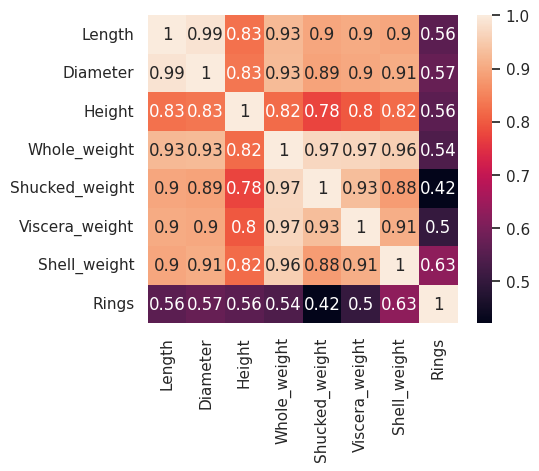

In [209]:
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr() , annot= True )
plt.show()

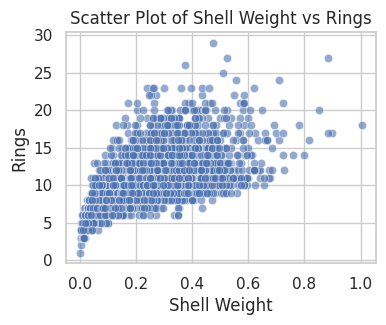

In [210]:
plt.figure(figsize=(4, 3))
plt.scatter(df['Shell_weight'], df['Rings'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Shell Weight')
plt.ylabel('Rings')
plt.title('Scatter Plot of Shell Weight vs Rings')
plt.grid(True)

In [211]:
# Create new binary columns for each category in the 'Sex' column
# Convert 'Sex' column to binary indicators: 1 for the respective category, 0 otherwise
df['Sex_M'] = (df['Sex'] == "M").astype(int)  # 1 if male, 0 otherwise
df['Sex_F'] = (df['Sex'] == "F").astype(int)  # 1 if female, 0 otherwise
df['Sex_I'] = (df['Sex'] == "I").astype(int)  # 1 if infant, 0 otherwise

# Drop the original 'Sex' column as it is now represented by the binary indicator columns
df.drop('Sex', axis=1, inplace=True)

In [212]:
# Remove the target variable 'Rings' from the list of numerical columns
num_cols = num_cols.drop('Rings')

In [213]:
# Add a constant term to the features matrix for Ordinary Least Squares (OLS) regression
X_ols = sm.add_constant(df.drop(['Rings'], axis=1))
y_ols = df['Rings']  # Define the target variable

# Fit an Ordinary Least Squares (OLS) linear model
model_ols = sm.OLS(y_ols, X_ols).fit()

# Display the summary of the OLS linear model
print("OLS Linear Model Summary:")
print(model_ols.summary())

# Extract p-values for each feature in the OLS linear model
p_values_ols = model_ols.pvalues
print("\nP-values for each feature in OLS Linear Model:")
print(p_values_ols)

OLS Linear Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.6
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        03:14:36   Log-Likelihood:                -9204.8
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             

In [214]:
# Splitting the data into features and target variable
features = df.drop(['Rings', 'Length'], axis=1)  # Features without 'Rings' and 'Length' columns
target = df['Rings']  # Target variable 'Rings'

In [217]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=65)

In [218]:
# fucntion evaluates and returns test performance based on metrics scores
def evaluate_reg_model(model, x_test, y_test):
    # predict the test data
    y_predict      = model.predict(x_test)

    # calculate metrics scores
    r2       = metrics.r2_score(y_test, y_predict)
    mae      = metrics.mean_absolute_error(y_test, y_predict)
    mse      = metrics.mean_squared_error(y_test, y_predict)
    rmse     = np.sqrt(metrics.mean_absolute_error(y_test, y_predict))

    # return retrieved values
    return {'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse,}


# function evalutes and prints performance results
def print_reg_metrics(results, model_name):
    # store each metrics into different variable
    r2       = np.nanmean(results['r2'])
    mae      = np.nanmean(results['mae'])
    mse      = np.nanmean(results['mse'])
    rmse     = np.nanmean(results['rmse'])
    coef     = lin_reg.coef_
    intr     = lin_reg.intercept_

    # print results
    heading_length = 100
    print()
    print('='*heading_length)
    print(f'Cross validation metrics : {model_name}')
    print('='*heading_length)
    print(f'R Squared                : {r2:.10f}')
    print(f'Mean Absolute Error      : {mae:.10f}')
    print(f'Mean Squared Error       : {mse:.10f}')
    print(f'Root Mean Squared Error  : {rmse:.10f}')
    print(f'Regression Intercept     : {intr}')
    print(f'Regression Coefficients  : {coef}')
    print('-'*heading_length)
    print()

In [219]:
from sklearn.metrics import mean_squared_error
from   sklearn                import metrics, linear_model
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [220]:
# apply linear regression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train, y_train)

# evaluate and print performance
model_name = 'Linear Regression'
lin_reg_eval = evaluate_reg_model(lin_reg, x_test, y_test)
print_reg_metrics(lin_reg_eval, model_name)


Cross validation metrics : Linear Regression
R Squared                : 0.4844254093
Mean Absolute Error      : 1.6098160885
Mean Squared Error       : 5.4151589718
Root Mean Squared Error  : 1.2687852807
Regression Intercept     : 47860368112446.45
Regression Coefficients  : [ 8.22364725e+00  2.44598837e+01  9.58078687e+00 -1.97072904e+01
 -1.21968743e+01  5.57187715e+00 -4.78603681e+13 -4.78603681e+13
 -4.78603681e+13]
----------------------------------------------------------------------------------------------------



In [221]:
# apply ridge regression
#higher alpha means higher penalty

for alpha in [0.5, 1, 2, 5, 10]:
  ridge_reg = Ridge(alpha=alpha)  # alpha parameter is ther regularization parameter
  ridge_reg.fit(x_train, y_train)
  print('Alpha = ', alpha)
  # evaluate and print performance
  model_name = 'Ridge Regression'
  ridge_reg_eval = evaluate_reg_model(ridge_reg, x_test, y_test)
  print_reg_metrics(ridge_reg_eval, model_name)

Alpha =  0.5

Cross validation metrics : Ridge Regression
R Squared                : 0.5217916707
Mean Absolute Error      : 1.5965612580
Mean Squared Error       : 5.0226953999
Root Mean Squared Error  : 1.2635510508
Regression Intercept     : 47860368112446.45
Regression Coefficients  : [ 8.22364725e+00  2.44598837e+01  9.58078687e+00 -1.97072904e+01
 -1.21968743e+01  5.57187715e+00 -4.78603681e+13 -4.78603681e+13
 -4.78603681e+13]
----------------------------------------------------------------------------------------------------

Alpha =  1

Cross validation metrics : Ridge Regression
R Squared                : 0.5277710711
Mean Absolute Error      : 1.5969208510
Mean Squared Error       : 4.9598928408
Root Mean Squared Error  : 1.2636933374
Regression Intercept     : 47860368112446.45
Regression Coefficients  : [ 8.22364725e+00  2.44598837e+01  9.58078687e+00 -1.97072904e+01
 -1.21968743e+01  5.57187715e+00 -4.78603681e+13 -4.78603681e+13
 -4.78603681e+13]
------------------------

In [223]:
# Define a function to print evaluation metrics
def print_evaluate(true, predicted, x_train):
    # Calculate evaluation metrics
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)

    # Calculate adjusted R-squared
    n = len(x_train)
    p = x_train.shape[1]
    r2_adjusted = 1 - ((1 - r2_square) * (n - 1) / (n - p - 1))

    # Print evaluation metrics
    print('Test set evaluation:\n_____________________________________')
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('R2 Adjusted:', r2_adjusted)

In [224]:
# Instantiate a CatBoostRegressor model with evaluation metric set to RMSE
cbr = CatBoostRegressor(eval_metric='RMSE')

# Train the CatBoostRegressor model
cbr.fit(x_train, y_train)

# Make predictions on the test set using the trained model
preds = cbr.predict(x_test)

# Print evaluation metrics
print_evaluate(y_test, preds, x_train)

Learning rate set to 0.049036
0:	learn: 3.1571022	total: 6.11ms	remaining: 6.11s
1:	learn: 3.0962770	total: 16.6ms	remaining: 8.28s
2:	learn: 3.0475458	total: 22.3ms	remaining: 7.41s
3:	learn: 2.9999042	total: 28.2ms	remaining: 7.02s
4:	learn: 2.9539300	total: 40.9ms	remaining: 8.14s
5:	learn: 2.9075092	total: 47.3ms	remaining: 7.83s
6:	learn: 2.8673650	total: 59.1ms	remaining: 8.39s
7:	learn: 2.8263302	total: 64.7ms	remaining: 8.02s
8:	learn: 2.7920442	total: 70.2ms	remaining: 7.73s
9:	learn: 2.7583695	total: 77ms	remaining: 7.62s
10:	learn: 2.7271363	total: 99ms	remaining: 8.9s
11:	learn: 2.6940492	total: 126ms	remaining: 10.4s
12:	learn: 2.6673334	total: 142ms	remaining: 10.8s
13:	learn: 2.6373890	total: 145ms	remaining: 10.2s
14:	learn: 2.6171236	total: 151ms	remaining: 9.9s
15:	learn: 2.5922549	total: 195ms	remaining: 12s
16:	learn: 2.5653445	total: 201ms	remaining: 11.6s
17:	learn: 2.5432294	total: 214ms	remaining: 11.7s
18:	learn: 2.5272083	total: 222ms	remaining: 11.4s
19:	lear

In [225]:
# Define the grid of hyperparameters to search over
grid = {'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2],
        'iterations': [2, 10, 50, 100, 200, 400, 500, 700] ,
        'bootstrap_type':['MVS' , 'Bayesian' , 'Bernoulli'] ,
        'l2_leaf_reg':[0.1, 0.2 , 0.5 , 0.7 , 0.9 , 3]}

In [ ]:
#Instantiate a CatBoostRegressor model with evaluation metric set to RMSE
cbr = CatBoostRegressor(eval_metric='RMSE')

# Perform grid search using the grid of hyperparameters specified and training data
# grid_search_result will contain the results of the grid search
grid_search_result = cbr.grid_search(grid,
                                     X=x_train,
                                     y=y_train,
                                     plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
17:	learn: 8.8427849	test: 8.6479005	best: 8.6479005 (17)	total: 36.1ms	remaining: 64.2ms
18:	learn: 8.7626494	test: 8.5674196	best: 8.5674196 (18)	total: 38.1ms	remaining: 62.1ms
19:	learn: 8.6830996	test: 8.4879966	best: 8.4879966 (19)	total: 40.1ms	remaining: 60.1ms
20:	learn: 8.6044596	test: 8.4087421	best: 8.4087421 (20)	total: 42ms	remaining: 58ms
21:	learn: 8.5265407	test: 8.3312925	best: 8.3312925 (21)	total: 43.9ms	remaining: 55.8ms
22:	learn: 8.4494638	test: 8.2541924	best: 8.2541924 (22)	total: 45.9ms	remaining: 53.9ms
23:	learn: 8.3737988	test: 8.1780969	best: 8.1780969 (23)	total: 47.2ms	remaining: 51.1ms
24:	learn: 8.2985029	test: 8.1026956	best: 8.1026956 (24)	total: 49.1ms	remaining: 49.1ms
25:	learn: 8.2239002	test: 8.0277691	best: 8.0277691 (25)	total: 51ms	remaining: 47ms
26:	learn: 8.1500568	test: 7.9540583	best: 7.9540583 (26)	total: 52.8ms	remaining: 44.9ms
27:	learn: 8.0777931	test: 7.8817573	best: 7.8817573 (27)

#Out of curiosity Analysis (:

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(principal_df['Class'], principal_df['Cluster'])
cm_df = pd.DataFrame(cm, index=['Non-Fraud', 'Fraud'], columns=['Cluster 0', 'Cluster 1'])
cm_df

,Cluster 0,Cluster 1
Non-Fraud,284253,62
Fraud,71243,213072


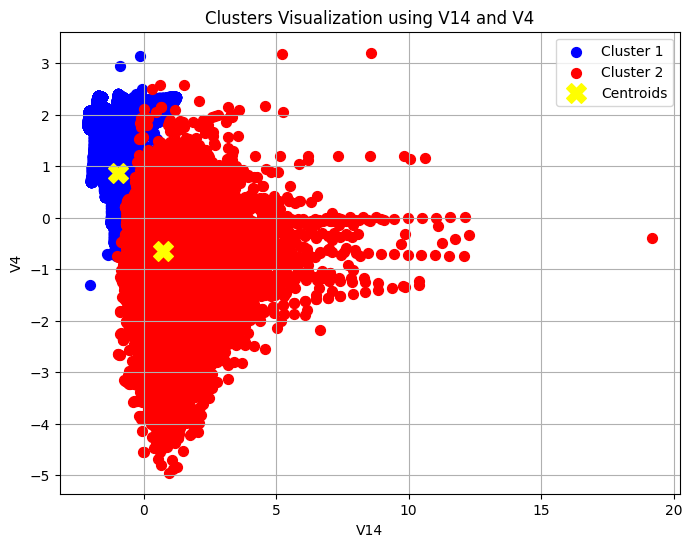

In [ ]:
# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df.drop('Class', axis=1))

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Plot the clusters using 'V14' and 'V4'
plt.figure(figsize=(8, 6))

plt.scatter(df[df['Cluster'] == 0]['V14'], df[df['Cluster'] == 0]['V4'], s=50, c='blue', label='Cluster 1')
plt.scatter(df[df['Cluster'] == 1]['V14'], df[df['Cluster'] == 1]['V4'], s=50, c='red', label='Cluster 2')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, df.columns.get_loc('V14')], centers[:, df.columns.get_loc('V4')], s=200, c='yellow', marker='X', label='Centroids')

plt.xlabel('V14')
plt.ylabel('V4')
plt.title('Clusters Visualization using V14 and V4')
plt.legend()
plt.grid(True)
plt.show()

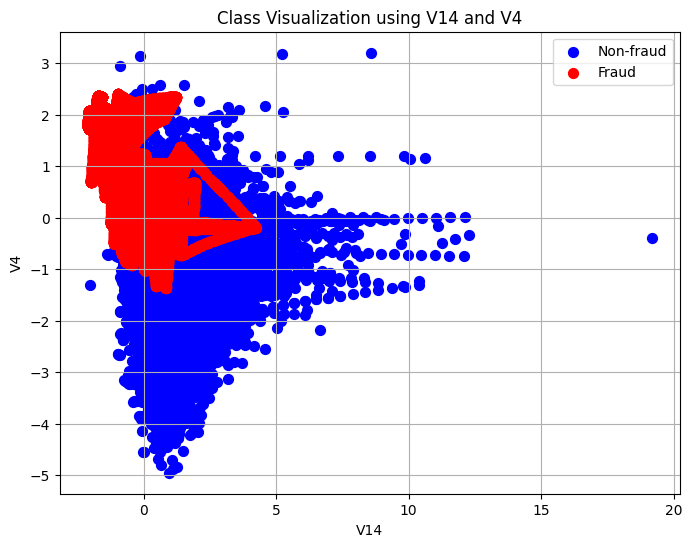

In [ ]:
# Plot the clusters using 'V14' and 'V4'
plt.figure(figsize=(8, 6))

plt.scatter(df[df['Class'] == 0]['V14'], df[df['Class'] == 0]['V4'], s=50, c='blue', label='Non-fraud')
plt.scatter(df[df['Class'] == 1]['V14'], df[df['Class'] == 1]['V4'], s=50, c='red', label='Fraud')


plt.xlabel('V14')
plt.ylabel('V4')
plt.title('Class Visualization using V14 and V4')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(df['Class'], df['Cluster'])
cm_df = pd.DataFrame(cm, index=['Non-Fraud', 'Fraud'], columns=['Cluster 0', 'Cluster 1'])
cm_df

,Cluster 0,Cluster 1
Non-Fraud,2808,281507
Fraud,248389,35926
